In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Part-1

In [80]:
def Gaussian(x):
    return np.exp(-x**2/4);

In [81]:
def expo(x):
    if(x<0):
        return 0
    else:
        return np.exp(-x)

In [82]:
#Metropolis-hastings Algorithm to generate the distributions
def metrostep(xn,Weight):
    
    xt = xn + np.random.normal(size=1);
    
    r = Weight(xt)/Weight(xn);
    
    if r>1:
        xnext = xt;
    else:
        eta = np.random.uniform(0,1);
        
        if eta<r:
            xnext = xt;
        else:
            xnext = xn;
            
    return xnext

In [83]:
iter = 10000

x0 = 0
samples = np.zeros(iter)
thermal = 5000

for i in range(thermal):
    xn = metrostep(x0,Gaussian)
    x0= xn
    
samples[0] = x0

for i in range(iter-1):
    xn = metrostep(samples[i],Gaussian)
    samples[i+1] = xn

First I generate the Gaussian distribution which will be also used to evaluate the integral in Part-II. The gaussian distribution is fit with a function to show the accuracy

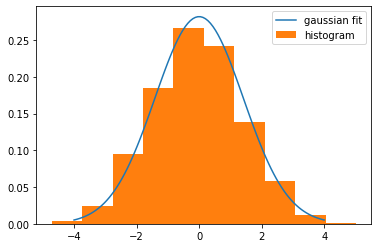

In [85]:
x = np.linspace(-4,4,100)
plt.plot(x,Gaussian(x)*(1/np.sqrt(4*np.pi)),label="gaussian fit")
plt.hist(samples,density = True,label="histogram")
plt.legend()
plt.savefig("gaussiandis.pdf")
plt.show()

In [86]:
def Randwalk(sampledist): #algorithm to generate 1D random walk based on the given distribution

    t = 0
    x = 0

    time = [t]
    position = [x] 

    for i in range (len(sampledist)):
        move = sampledist[i]
        t += 1
        x += move  

        time.append(t)
        position.append(x)

    return [time,position]

In [87]:
t,x =Randwalk(samples)
t1,x1 =Randwalk(samples1)

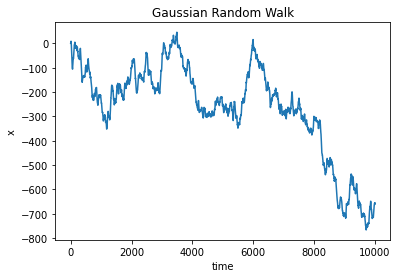

In [89]:
plt.plot(t,x)
plt.xlabel("time")
plt.ylabel("x")
plt.title("Gaussian Random Walk")
plt.savefig("gaussian1drandomwalk.pdf")

In [90]:
iter = 1000 #for sampling the exponential distribution

x0 = 0
samples1 = np.zeros(iter)
thermal = 500

for i in range(thermal):
    xn = metrostep(x0,expo)
    x0= xn
    
samples1[0] = x0

for i in range(iter-1):
    xn = metrostep(samples1[i],expo)
    samples1[i+1] = xn

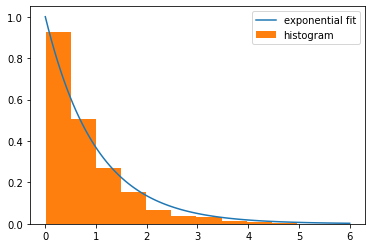

In [94]:
x = np.linspace(0,6,100)
exponent = np.zeros(100)

for i in range(len(x)):
    exponent[i] = expo(x[i])

plt.plot(x,exponent,label="exponential fit")
plt.hist(samples1,density=True,label="histogram")
plt.legend()
plt.savefig("expodis.pdf")
plt.show()


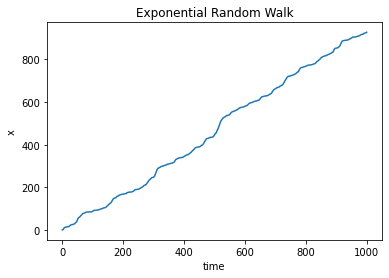

In [96]:
plt.plot(t1,x1)
plt.xlabel("time")
plt.ylabel("x")
plt.title("Exponential Random Walk")
plt.savefig("Expo1drandomwalk.pdf")

## Part-II

Calculating the integral using the Gaussian distribution:

$$ \int_{-\infty}^{\infty} dx \ e^{(\frac{-x^2}{4})} x^2 $$

The real value of this integral is $4 \pi^{1/2}$.

The weight function here is $w(x) = e^{(\frac{-x^2}{4})}$. So ${X_i}$ are sampled acording to this weight distribution and the integral is just the average now.

In [56]:
calc = np.mean(samples**2)*np.sqrt(4*np.pi) #average of xi^2 with normalisation factor
print(calc)

7.035432299239778


In [49]:
realvalue = 4*np.sqrt(np.pi)

In [59]:
error = (realvalue-calc)/realvalue

print(error)

0.007670595253368962


It's pretty accurate

In [64]:
def run(iterate,thermal,x0):

    
    samples = np.zeros(iterate)
    

    for i in range(thermal):
        xn = metrostep(x0,Gaussian)
        x0= xn
    
    samples[0] = x0

    for i in range(iterate-1):
        xn = metrostep(samples[i],Gaussian)
        samples[i+1] = xn
        
    return samples

In [73]:
therm = np.arange(100,2000,100)
N = 1000
x0 = 0
errorlist = []


for i in range(len(therm)):
    config=run(N,therm[i],x0)
    calc = np.mean(config**2)*np.sqrt(4*np.pi)
    error = (realvalue-calc)/realvalue
    errorlist.append(error)



Effect of thermalization steps on the result. The more the better.

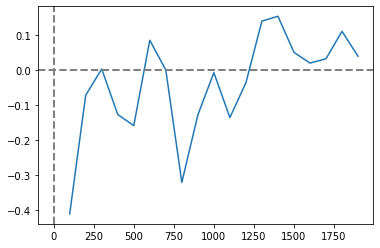

In [75]:
plt.plot(therm,errorlist)
plt.axhline(0, color='grey',linestyle='--',linewidth=2)
plt.axvline(0, color='grey',linestyle='--',linewidth=2)

In [78]:
therm = 500
N = 1000
x0 = np.linspace(-1,1,50)
errorlist = []


for i in range(len(x0)):
    config=run(N,therm,x0[i])
    calc = np.mean(config**2)*np.sqrt(4*np.pi)
    error = (realvalue-calc)/realvalue
    errorlist.append(error)

Effect of starting position on the result. x0 =0 seems to be the best choice to start

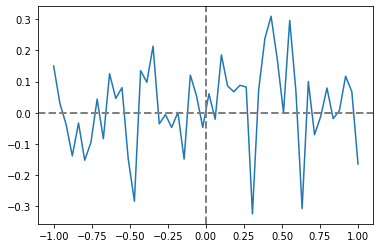

In [79]:
plt.plot(x0,errorlist)
plt.axhline(0, color='grey',linestyle='--',linewidth=2)
plt.axvline(0, color='grey',linestyle='--',linewidth=2)